## Core-SED-plots

- Plot SED and models  from input tables

- aut = 'Pbcorr'


In [10]:
import numpy as np
from astropy.io import ascii, fits
from ants import fluxInt, pbCorr, synCl, cvMe
from ants import fitSource
from prettytable import PrettyTable
import shutil,os
import fitSource


#ftSrc = fitSource.fitsrc()
fint = fluxInt.fluxint()
pb = pbCorr.pbcorr()
syn = synCl.synClean()

#rootdir
rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/core/'
#rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/core/'
imDir = rootDir + 'imDir/'
plotDir = rootDir+ 'coreFigs/'
#label

aut = 'Pbcorr'


label = ['Tot','Beam','Out']
synMod = ['CI', 'CIOFF']

synOut = rootDir+'synOut/'
outTabs = rootDir+'outTabs/'

#FLUX Tables
outBeam=outTabs+'coreFlux'+label[1]+aut+'.tbl'
outOut=outTabs+'coreFlux'+label[2]+aut+'.tbl'

synStatsBeamCI = synOut+'core'+label[1]+aut+synMod[0]+'.stats'
synStatsBeamCIOFF = synOut+'core'+label[1]+aut+synMod[1]+'.stats'

synFitBeamCI = synOut+'core'+label[1]+aut+synMod[0]+'_point1_fit.dat'
synFitBeamCIOFF = synOut+'core'+label[1]+aut+synMod[1]+'_point1_fit.dat'

synStatsOutCI = synOut+'core'+label[2]+aut+synMod[0]+'.stats'
synStatsOutCIOFF = synOut+'core'+label[2]+aut+synMod[1]+'.stats'

synFitOutCI = synOut+'core'+label[2]+aut+synMod[0]+'_point1_fit.dat'
synFitOutCIOFF = synOut+'core'+label[2]+aut+synMod[1]+'_point1_fit.dat'

fint.rootdir = imDir
syn.rootdir = imDir
pb.rootdir = imDir

print outBeam

#tableName = inTabs+'coreFileNames'+aut+'.tbl'
#tableFileNames= ascii.read(tableName,format='csv')

#print tableFileNames.columns[0]

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''
print outBeam

/Users/maccagni/Projects/MFS/FornaxA/contData/core/outTabs/coreFluxBeamPbcorr.tbl
	+---------+
	 Inputs loaded
	+---------+
/Users/maccagni/Projects/MFS/FornaxA/contData/core/outTabs/coreFluxBeamPbcorr.tbl


In [11]:
totBeam= ascii.read(outBeam, fast_reader=False)

statsBeamCI = syn.readCIStats(synStatsBeamCI)
statsBeamCIOFF =  syn.readCIOFFStats(synStatsBeamCIOFF)


modBeamCI = syn.readCIMod(synFitBeamCI)
modBeamCIOFF = syn.readCIMod(synFitBeamCIOFF)

print '''\t+---------+\n\t Central Beam \n\t+---------+'''
CI = PrettyTable(['CI', 'value'])
for key, val in statsBeamCI.items():
    CI.add_row([key, val])
print CI


CIOFF = PrettyTable(['CIOFF', 'value'])
for key, val in statsBeamCIOFF.items():
    CIOFF.add_row([key, val])
print CIOFF

totOut= ascii.read(outOut, fast_reader=False)


statsOutCI = syn.readCIStats(synStatsOutCI)
statsOutCIOFF =  syn.readCIOFFStats(synStatsOutCIOFF)

modOutCI = syn.readCIMod(synFitOutCI)
modOutCIOFF = syn.readCIMod(synFitOutCIOFF)

print '''\t+---------+\n\t Outer centre \n\t+---------+'''
CI = PrettyTable(['CI', 'value'])
for key, val in statsOutCI.items():
    CI.add_row([key, val])
print CI


CIOFF = PrettyTable(['CIOFF', 'value'])
for key, val in statsOutCIOFF.items():
    CIOFF.add_row([key, val])
print CIOFF


print '''\t+---------+\n\t Synage results read\n\t+---------+'''


	+---------+
	 Central Beam 
	+---------+
+--------------+------------+
|      CI      |   value    |
+--------------+------------+
| alpha_errsup | 0.03568561 |
|    break     |  26807.12  |
|    chisq     |  12.05433  |
|    chired    |  6.027163  |
|  break_inf   | -17895.53  |
|    alpha     | 0.6668415  |
|     ndf      |    2.0     |
| alpha_errinf | -0.0983777 |
|     norm     | 0.01397361 |
|  break_sup   |  4054.054  |
+--------------+------------+
+--------------+--------------+
|    CIOFF     |    value     |
+--------------+--------------+
|   t_errinf   |  -0.8902509  |
|    tratio    |  0.8912509   |
|   t_errsup   | 3.813375e-08 |
|    break     |   126149.6   |
|    chisq     |   7.765056   |
|    alpha     |  0.6649108   |
| alpha_errinf | -0.07243227  |
| alpha_errsup |  0.0466175   |
|    chired    |   7.765056   |
|     ndf      |     1.0      |
|  break_inf   |  -113893.5   |
|  break_sup   |   42975.32   |
|     norm     | 0.004867041  |
+--------------+----------

In [12]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

def plCoreJets(tot1,tot2,labe1,labe2,sed):

    params = {'font.family'         :' serif',
              'font.serif'          :'times',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 22,
              'ytick.labelsize'     : 22, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 6,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 3,
              'xtick.minor.width'   : 1,
              'ytick.major.size'    : 6,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 3,
              'ytick.minor.width'   : 1, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(10,10))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([5e-5,5e-1])
    ax1.set_xlim([5e2,2e5])
    ax1.tick_params(axis='both', which='major', pad=5)

    #POINTS
    
    # MODELS
    
    #idx_max = (np.abs(mod1_CI[0] - 5e5)).argmin()
    #idx_min = (np.abs(mod1_CI[0] - 30)).argmin()

    
    totplot = ax1.errorbar(tot1['Frequency [MHz]'],tot1['Integrated Flux [Jy]'], yerr=tot1['Error [Jy]'],
             marker='o',markersize=10,color='green', linestyle=' ',label=labe1,capsize=6) 
    
    totplot = ax1.errorbar(tot2['Frequency [MHz]'],tot2['Integrated Flux [Jy]'], yerr=tot2['Error [Jy]'],
             marker='o',markersize=10, color='m', linestyle=' ',label=labe2,capsize=6)     

    totplot[-1][0].set_linestyle('--')
    totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 23})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,
                format='pdf',dpi=300,transparent=False,bbox_inches='tight',overwrite=True)



print '\n\t-----> Loaded <-----'


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----

	-----> Loaded <-----


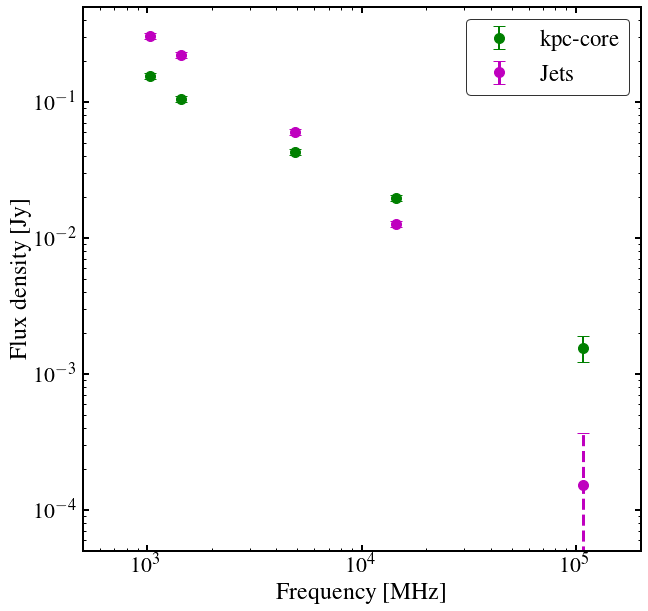

In [13]:
outplot=plotDir+'coreJets'+aut+'_New.pdf'
plCoreJets(totBeam,totOut,'kpc-core','Jets',outplot)

In [14]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
def plCIovCIOFFMultiReg(tot1,mod1_CI,mod1_CIOFF,stats1CI,stats1CIOFF,
                        tot2,mod2_CI,mod2_CIOFF,stats2CI,stats2CIOFF,labe1,labe2,sed):
    params = {'font.family'         :' serif',
              'font.serif'          :'times',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 22,
              'ytick.labelsize'     : 22, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 6,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 3,
              'xtick.minor.width'   : 1,
              'ytick.major.size'    : 6,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 3,
              'ytick.minor.width'   : 1, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(10,10))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([5e-5,5e-1])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)

    #POINTS
    
    # MODELS
    
    idx_max = (np.abs(mod1_CI[0] - 5e5)).argmin()
    idx_min = (np.abs(mod1_CI[0] - 30)).argmin()

    ax1.plot(mod1_CI[0][idx_min:idx_max],mod1_CI[1][idx_min:idx_max],lw=3, marker=' ', 
             color='darkgreen', linestyle=':',label='CI',alpha=0.5)

    idx_br = (np.abs(mod1_CI[0] - float(stats1CI['break']))).argmin()
    #ax1.axvline(stats1CI['break'],ymin=0,ymax=0.58,ls=':',c='darkgreen',lw=2,alpha=0.5)

    ax1.plot(mod1_CIOFF[0][idx_min:idx_max],mod1_CIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
             color='mediumseagreen', linestyle='--',label=r'CI$_{\rm OFF}$',alpha=0.5)

    idx_br = (np.abs(mod1_CIOFF[0] - float(stats1CIOFF['break']))).argmin()
    #ax1.axvline(stats1CIOFF['break'],ymin=0,ymax=0.55,ls='--',c='mediumseagreen',lw=3,alpha=0.8)
    
    totplot = ax1.errorbar(tot1['Frequency [MHz]'],tot1['Integrated Flux [Jy]'], yerr=tot1['Error [Jy]'],
             marker='o', color='green', linestyle=' ',label=labe1,capsize=6) 
    
    ax1.plot(mod2_CI[0][idx_min:idx_max],mod2_CI[1][idx_min:idx_max],lw=3, marker=' ', 
             color='darkmagenta', linestyle=':',label='CI',alpha=0.5)

    idx_br = (np.abs(mod2_CI[0] - float(stats2CI['break']))).argmin()
    #ax1.axvline(stats2CI['break'],ymin=0,ymax=0.58,ls=':',c='darkmagenta',lw=2,alpha=0.5)

    ax1.plot(mod2_CIOFF[0][idx_min:idx_max],mod2_CIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
             color='hotpink', linestyle='--',label=r'CI$_{\rm OFF}$',alpha=0.5)

    idx_br = (np.abs(mod2_CIOFF[0] - float(stats2CIOFF['break']))).argmin()
    #ax1.axvline(stats2CIOFF['break'],ymin=0,ymax=0.55,ls='--',c='hotpink',lw=3,alpha=0.8)
    
    totplot = ax1.errorbar(tot2['Frequency [MHz]'],tot2['Integrated Flux [Jy]'], yerr=tot2['Error [Jy]'],
             marker='o', color='m', linestyle=' ',label=labe2,capsize=6)     

    totplot[-1][0].set_linestyle('--')
    totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 23})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,
                format='pdf',dpi=300,transparent=False,bbox_inches='tight',overwrite=True)



print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


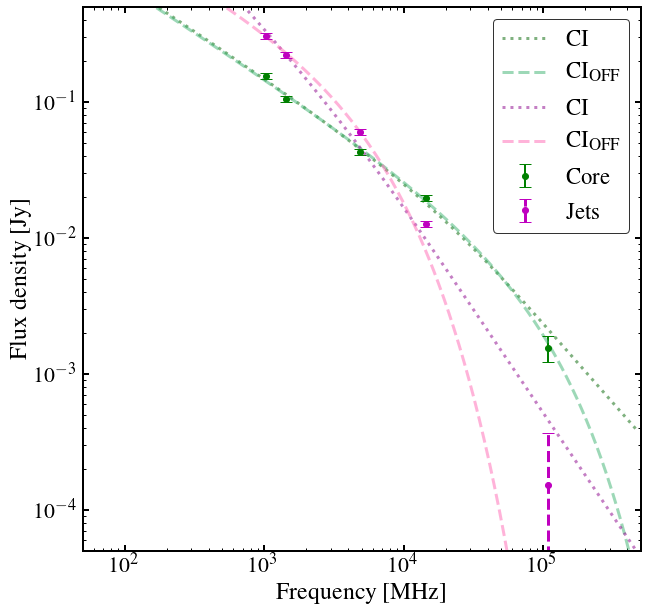

In [15]:
outplot=plotDir+'coreJetsMod'+aut+'_New.pdf'
plCIovCIOFFMultiReg(totBeam,modBeamCI,modBeamCIOFF,statsBeamCI,statsBeamCIOFF,
            totOut,modOutCI,modOutCIOFF,statsOutCI,statsOutCIOFF,'Core','Jets',outplot)

In [266]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
def plCIovCIOFF(tot1,mod1_CI,mod1_CIOFF,stats1CI,stats1CIOFF,labe1,cc,sed):
    params = {'font.family'         :' serif',
              'font.serif'          :'times',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 24,
              'axes.linewidth'      : 2,
              'lines.linewidth'     : 2,
              'xtick.labelsize'     : 22,
              'ytick.labelsize'     : 22, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 6,
              'xtick.major.width'   : 2,
              'xtick.minor.size'    : 3,
              'xtick.minor.width'   : 1,
              'ytick.major.size'    : 6,
              'ytick.major.width'   : 2,
              'ytick.minor.size'    : 3,
              'ytick.minor.width'   : 1, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(10,10))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-4,5e-1])
    ax1.set_xlim([5e2,3e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    #POINTS
    #if cc[0] == 'm':
    #    uplims = np.array([0, 0, 0, 0, 1], dtype=bool)
    #else:
    #    uplims = np.array([0, 0, 0, 0, 0], dtype=bool)

    # MODELS
    
    idx_max = (np.abs(mod1_CI[0] - 5e5)).argmin()
    idx_min = (np.abs(mod1_CI[0] - 30)).argmin()

    totplot = ax1.errorbar(tot1['Frequency [MHz]'],tot1['Integrated Flux [Jy]'], yerr=tot1['Error [Jy]'],
             marker='o', color=cc[0], linestyle=' ',label=labe1,capsize=6,markersize=10) 

    totplot[-1][0].set_linestyle('--')
    totplot[-1][0].set_linewidth(3)     
    
    ax1.plot(mod1_CI[0][idx_min:idx_max],mod1_CI[1][idx_min:idx_max],lw=3, marker=' ', 
             color=cc[1], linestyle=':',label='CI',alpha=0.5)

    idx_br = (np.abs(mod1_CI[0] - float(stats1CI['break']))).argmin()
    #ax1.axvline(stats1CI['break'],ymin=0,ymax=0.58,ls=':',c=cc[1],lw=2,alpha=0.5)

    ax1.plot(mod1_CIOFF[0][idx_min:idx_max],mod1_CIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
             color=cc[2], linestyle='--',label=r'CI$_{\rm OFF}$',alpha=0.5)

    idx_br = (np.abs(mod1_CIOFF[0] - float(stats1CIOFF['break']))).argmin()
    #ax1.axvline(stats1CIOFF['break'],ymin=0,ymax=0.55,ls='--',c=cc[2],lw=3,alpha=0.8)
    
   
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 23})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,
                format='pdf',dpi=300,transparent=False,bbox_inches='tight',overwrite=True)



print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


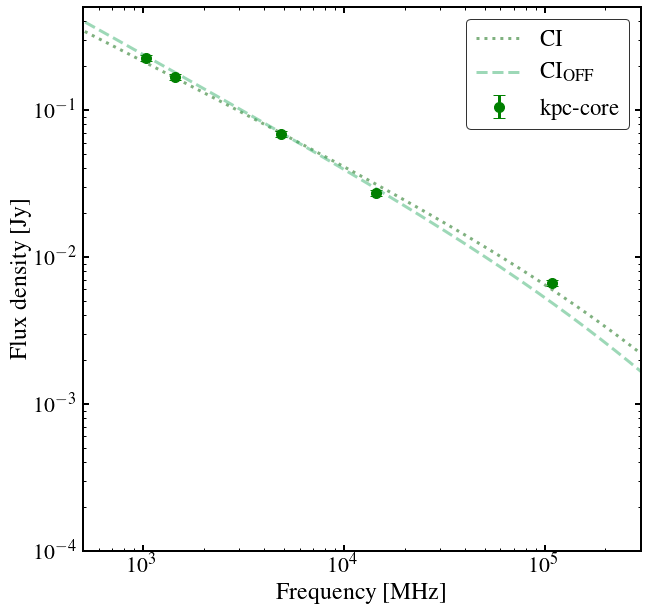

In [267]:
outplot=plotDir+'coreMod'+aut+'.pdf'
plCIovCIOFF(totBeam,modBeamCI,modBeamCIOFF,statsBeamCI,statsBeamCIOFF,'kpc-core',['green','darkgreen','mediumseagreen'],outplot)

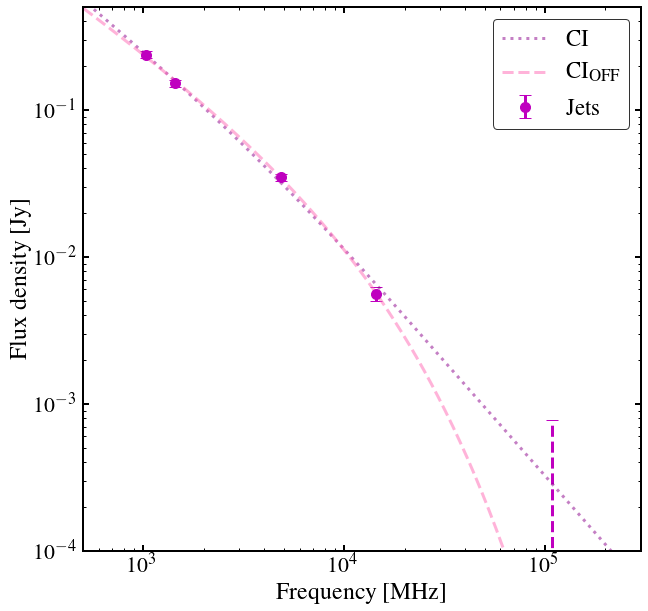

In [268]:
outplot=plotDir+'jetsMod'+aut+'Tmp1.pdf'
plCIovCIOFF(totOut,modOutCI,modOutCIOFF,statsOutCI,statsOutCIOFF,'Jets',['m','darkmagenta','hotpink'],outplot)